In [1]:
import fsspec
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap,shiftgrid

from matplotlib import colors as c

In [2]:
#读数据
filepath = 'https://power-analysis-ready-datastore.s3.amazonaws.com/power_901_monthly_meteorology_utc.zarr'
filepath_mapped = fsspec.get_mapper(filepath)
ds = xr.open_zarr(store=filepath_mapped, consolidated=True)
ds

<xarray.Dataset>
Dimensions:          (time: 504, lat: 361, lon: 576)
Coordinates:
  * lat              (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * lon              (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * time             (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2022-12-31
Data variables: (12/94)
    CDD0             (time, lat, lon) float64 ...
    CDD10            (time, lat, lon) float64 ...
    CDD18_3          (time, lat, lon) float64 ...
    DISPH            (time, lat, lon) float64 ...
    EVLAND           (time, lat, lon) float64 ...
    EVPTRNS          (time, lat, lon) float64 ...
    ...               ...
    WS50M_MAX_AVG    (time, lat, lon) float64 ...
    WS50M_MIN        (time, lat, lon) float64 ...
    WS50M_MIN_AVG    (time, lat, lon) float64 ...
    WS50M_RANGE      (time, lat, lon) float64 ...
    WS50M_RANGE_AVG  (time, lat, lon) float64 ...
    Z0M              (time, lat, lon) float64 ...
Attributes: (12/37)
    acknowledgement:            The Prediction of Worldwide Energy Resources ...
    comment:                    Version 9.0.1 includes source data resolution.
    conventions:                CF-1.8, ACDD-1.3
    creator_email:              bradley.macpherson@nasa.gov
    creator_name:               Bradley Macpherson
    date_created:               2023-09-20T09:00:00.000000
    ...                         ...
    time_coverage_end:          2022-12-31T00:00:00
    time_coverage_resolution:   P1M
    time_coverage_start:        1981-01-01T00:00:00
    time_standard:              Universal Time Coordinated (UTC)
    title:                      POWER Monthly Meteorology Time Series
    version:                    POWER Version 9.0.1

In [95]:
ds.WS50M_RANGE_AVG.data

array([[[2.59375  , 2.59375  , 2.6015625, ..., 2.5859375, 2.5859375,
         2.5859375],
        [2.921875 , 2.921875 , 2.9296875, ..., 2.90625  , 2.9140625,
         2.9140625],
        [3.5859375, 3.5859375, 3.59375  , ..., 3.578125 , 3.578125 ,
         3.578125 ],
        ...,
        [4.6875   , 4.703125 , 4.7109375, ..., 4.640625 , 4.65625  ,
         4.671875 ],
        [4.1328125, 4.140625 , 4.1484375, ..., 4.1015625, 4.109375 ,
         4.125    ],
        [4.015625 , 4.0234375, 4.0390625, ..., 3.9921875, 4.       ,
         4.0078125]],

       [[1.9375   , 1.9453125, 1.9453125, ..., 1.921875 , 1.9296875,
         1.9296875],
        [2.4140625, 2.4140625, 2.421875 , ..., 2.40625  , 2.40625  ,
         2.4140625],
        [2.96875  , 2.9765625, 2.9765625, ..., 2.96875  , 2.96875  ,
         2.96875  ],
        ...,
        [4.5703125, 4.578125 , 4.5859375, ..., 4.546875 , 4.5546875,
         4.5625   ],
        [3.9453125, 3.953125 , 3.9609375, ..., 3.921875 , 3.9296875,
   

In [109]:
wind_speed=ds.WS50M_RANGE_AVG
wind_direct=ds.WD50M

In [119]:
wind_speed

<xarray.DataArray 'WS50M_RANGE_AVG' (time: 504, lat: 361, lon: 576)>
array([[[2.59375 , 2.59375 , ..., 2.585938, 2.585938],
        [2.921875, 2.921875, ..., 2.914062, 2.914062],
        ...,
        [4.132812, 4.140625, ..., 4.109375, 4.125   ],
        [4.015625, 4.023438, ..., 4.      , 4.007812]],

       [[1.9375  , 1.945312, ..., 1.929688, 1.929688],
        [2.414062, 2.414062, ..., 2.40625 , 2.414062],
        ...,
        [3.945312, 3.953125, ..., 3.929688, 3.9375  ],
        [3.609375, 3.617188, ..., 3.585938, 3.601562]],

       ...,

       [[1.898438, 1.898438, ..., 1.890625, 1.890625],
        [2.242188, 2.25    , ..., 2.242188, 2.242188],
        ...,
        [3.75    , 3.75    , ..., 3.734375, 3.742188],
        [3.835938, 3.851562, ..., 3.820312, 3.828125]],

       [[1.554688, 1.5625  , ..., 1.546875, 1.554688],
        [1.796875, 1.796875, ..., 1.796875, 1.796875],
        ...,
        [4.578125, 4.59375 , ..., 4.554688, 4.570312],
        [4.523438, 4.53125 , ..., 4.5     , 4.515625]]])
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time     (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2022-12-31
Attributes:
    long_name:      Wind Speed at 50 Meters Range Average
    standard_name:  Wind_Speed_at_50_Meters_Range_Average
    units:          m/s
    valid_max:      75.0
    valid_min:      0.0
    valid_range:    [0.0, 75.0]

In [176]:
lonlist = np.array(wind_speed['lon'])[0::10]
latlist = np.array(wind_speed['lat'])[0::10]
lonlist1=[]
latlist1=[]
u_wind=[]
v_wind=[]
for i in lonlist:
    for j in latlist:
        lonlist1.append(i)
        latlist1.append(j)
        u_wind.append(wind_speed.sel(lat=j,lon=i,time='2022-12-31T00:00:00.000000000').data*np.sin(wind_direct.sel(lat=j,lon=i,time='2022-12-31T00:00:00.000000000').data * np.pi / 180.))
        v_wind.append(wind_speed.sel(lat=j,lon=i,time='2022-12-31T00:00:00.000000000').data*np.cos(wind_direct.sel(lat=j,lon=i,time='2022-12-31T00:00:00.000000000').data * np.pi / 180.))

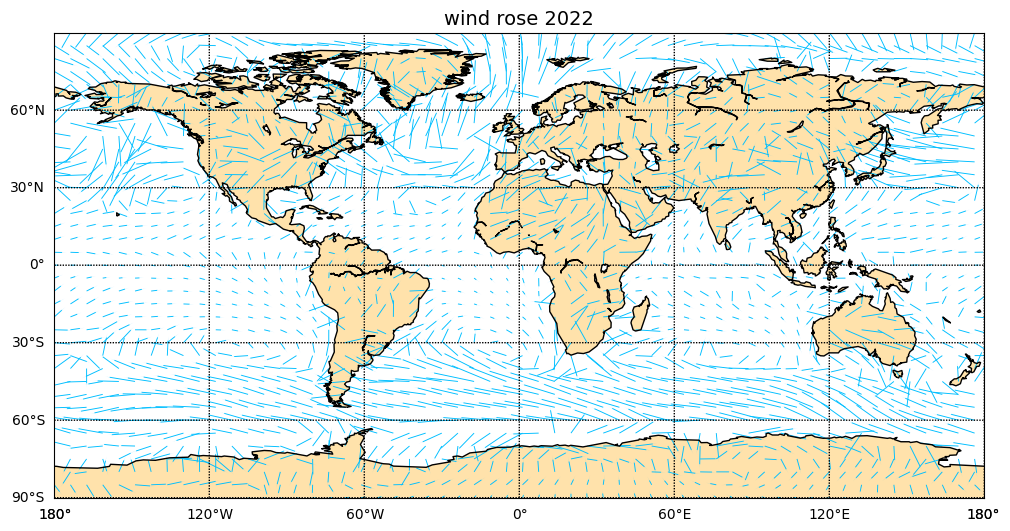

In [184]:
#这是化全球范围的图
fig = plt.figure(figsize=[12,15])  # 新窗口
ax = fig.add_subplot(1, 1, 1)  # 添加子图
ax.set_title('wind rose 2022', fontsize=14)
map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90, llcrnrlon=-180,urcrnrlon=180,resolution='c', ax=ax)
map.drawcoastlines()
map.fillcontinents(color='#ffe2ab')
# 添加经纬度
map.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0])
map.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
x, y = map(*(lonlist1, latlist1))

map.quiver(x,y, np.array(u_wind), np.array(v_wind), color='deepskyblue', width=0.001, scale=200, headwidth=0.1)

In [185]:
fig.savefig("wind_rose.jpg")